# **Housing Prices Assignment**
## *Upgrad Assignment*
###  by **Beng Cheong Cheong** 


# Aims of the project
This project aims to help a US-based housing company named Surprise Housing that has decided to enter the Australian market. The company is looking at prospective properties to buy to enter the market; therefore, our aim is to build a regression model using regularisation in order to predict the actual value of the prospective properties and help the company understand which variables are significant in predicting the price of a house, and how well those variables describe the price of a house.

## Table of Contents
* [0. Business Problem](#0-business-problem)
* [1. Data Understanding](#1-data-understanding)
* [2. Data Cleaning](#2-data-cleaning)
    * [2.1 Data Cleaning](#21-data-cleaning)
    * [2.1 Feature Engineering](#22-feature-engineering)
* [3. Data Analysis](#3-data-analysis)
    * [3.1 Categorical Variables](#31-categorical-variables)
    * [3.2 Numerical Variables](#32-numerical-variables)
    * [3.3 Summary](#33-summary)
* [4. Model Building](#4-model-building)
    * [4.1 Multiple Regression](#41-multiple-regression)
    * [4.2 Ridge Regression](#42-ridge-regression)
    * [4.3 Lasso Regression](#43-lasso-regression)
    * [4.4 Summary](#44-summary)
* [5. Model Evaluation](#5-model-evaluation)

# 0. Business Problem

Surprise Housing is looking to invest in the Australian market, but being new to Australia, does not know which variables are significant in predicting the price of a house, and how well those variables describe the price of a house.

# 1. Data Understanding

The first phase of the project consisted of becoming familiar with the data set. First step was in importing the necessary libraries, reading in the data set from the provided file into a data frame, and inspecting it. This phase is all about understanding what our data set looks, whether there are any issues such as too many null values, and what we kind of insights that we can extract from our dataset with the view of building a strong multiple linear regression model to predict the demand for bike sharing.

In [1]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import statsmodels.api as sm
import sklearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import scipy

import warnings #turning off warnings
warnings.filterwarnings('ignore')

#printing the versions of libraries to be used in this notebook
from platform import python_version
print("python: ",python_version())
print("numpy: ",np.__version__) #numpy version
print("pandas: ",pd.__version__) #pandas version
print("matplotlib: ",matplotlib.__version__) #matplotlib version
print("seaborn: ",sns.__version__)
print("plotly: ",plotly.__version__)
print("statsmodels: ",sm.__version__)
print("sklearn: ",sklearn.__version__)
print("scipy: ",scipy.__version__)

python:  3.8.8
numpy:  1.19.5
pandas:  1.2.4
matplotlib:  3.3.4
seaborn:  0.11.1
plotly:  5.5.0
statsmodels:  0.12.2
sklearn:  0.24.1
scipy:  1.6.2


In [2]:
#reading in .csv data file and previewing the data
df = pd.read_csv('ml2_train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# checking the dtype of each and every column, and checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# checking for null value in dataset
col_with_na = df.columns[df.isna().any()].tolist()
print(col_with_na)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [5]:
#count the number of null values in the dataset
for col in col_with_na:
    print("column name: {}, number of NAs: {}, column type: {}".format(col, df[col].isna().sum(), df[col].dtypes))

column name: LotFrontage, number of NAs: 259, column type: float64
column name: Alley, number of NAs: 1369, column type: object
column name: MasVnrType, number of NAs: 8, column type: object
column name: MasVnrArea, number of NAs: 8, column type: float64
column name: BsmtQual, number of NAs: 37, column type: object
column name: BsmtCond, number of NAs: 37, column type: object
column name: BsmtExposure, number of NAs: 38, column type: object
column name: BsmtFinType1, number of NAs: 37, column type: object
column name: BsmtFinType2, number of NAs: 38, column type: object
column name: Electrical, number of NAs: 1, column type: object
column name: FireplaceQu, number of NAs: 690, column type: object
column name: GarageType, number of NAs: 81, column type: object
column name: GarageYrBlt, number of NAs: 81, column type: float64
column name: GarageFinish, number of NAs: 81, column type: object
column name: GarageQual, number of NAs: 81, column type: object
column name: GarageCond, number of

In [6]:
#count the percentage of null values in the dataset
for col in col_with_na:
    na_perc = df[col].isna().sum()/df[col].shape[0]
    print("column name: {}, percentage of NAs: {}%, column type: {}".format(col, np.round(na_perc,2) * 100, df[col].dtypes))

column name: LotFrontage, percentage of NAs: 18.0%, column type: float64
column name: Alley, percentage of NAs: 94.0%, column type: object
column name: MasVnrType, percentage of NAs: 1.0%, column type: object
column name: MasVnrArea, percentage of NAs: 1.0%, column type: float64
column name: BsmtQual, percentage of NAs: 3.0%, column type: object
column name: BsmtCond, percentage of NAs: 3.0%, column type: object
column name: BsmtExposure, percentage of NAs: 3.0%, column type: object
column name: BsmtFinType1, percentage of NAs: 3.0%, column type: object
column name: BsmtFinType2, percentage of NAs: 3.0%, column type: object
column name: Electrical, percentage of NAs: 0.0%, column type: object
column name: FireplaceQu, percentage of NAs: 47.0%, column type: object
column name: GarageType, percentage of NAs: 6.0%, column type: object
column name: GarageYrBlt, percentage of NAs: 6.0%, column type: float64
column name: GarageFinish, percentage of NAs: 6.0%, column type: object
column name:

# 2. Data Cleaning

Here, a few issues were observed from the above data exploration and understanding process and some steps will be taken next to address these issues.
1. we have 80 dependent variables which can be feature selected
2. however, some of these variables are identifiers ('Id') or variables that indicate which year the house was being built
3. many null values in some columns

## 2.1 Data Cleaning

First step is to remove columns that have too many null values and removing feature columns which are identifiders.

In [7]:
# removing columns that have more than 10% null values from dataset
cols_to_remove = []

for col in col_with_na:
    na_perc = df[col].isna().sum()/df[col].shape[0]
    if na_perc >= 0.1:
        cols_to_remove.append(col)

remaining_cols = [col for col in df.columns if col not in cols_to_remove]
print("Removed Columns: ", cols_to_remove)

Removed Columns:  ['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [8]:
numeric_data, categorical_data = [],[]
df = df[remaining_cols]
for col in df.columns[1:]:
    if df[col].dtypes !='O':
        numeric_data.append(col)
    elif df[col].dtypes =='O':
        categorical_data.append(col)

In [9]:
#print remaining categorical variables
print(categorical_data)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [10]:
pd.options.display.max_columns = 50
df[categorical_data].describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,1379,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,870,605,1311,1326,1340,1267,1198


## 2.2 Feature Engineering

Next step, I converted the categorical features which are ordinal in nature to numeric columns and imputed the missing values with 0.

In [11]:
#understanding that among the variables, I observed that there are ordinal data columns.
#for ordinal data, I will convert them to numeric data type

cols_tobe_encoded = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond','HeatingQC','KitchenQual',
                 'GarageQual','GarageCond']

quality_labels_dict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
    
for col in cols_tobe_encoded: 
    df.loc[:,col] = df.loc[:,col].replace(quality_labels_dict)
    
df[cols_tobe_encoded] = df[cols_tobe_encoded].fillna(0) #filling in the missing values with 0

In [12]:
bsmt_exposure_dict = {'Gd':4,
                      'Av':3,
                      'Mn':2,
                      'No':1,
                      'NA':0}

bsmt_fintype_dict = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0}

df.loc[:,'BsmtExposure'] = df.loc[:,'BsmtExposure'].replace(bsmt_exposure_dict)
df['BsmtExposure'].fillna(0, inplace=True) #filling in the missing values with 0

for col in ['BsmtFinType1','BsmtFinType2']:
    df.loc[:,col]= df.loc[:,col].replace(bsmt_fintype_dict)
    df[col].fillna(0, inplace=True) #filling in the missing values with 0

# 3. Data Analysis

## 3.1 Categorical Variables
Here, I will be visualizing and exploring the data.
First step it is to visualize the categorical variables

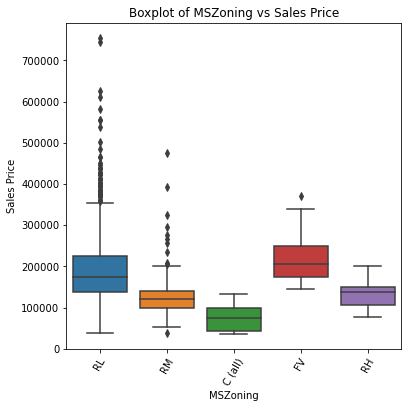

-----
MSZoning
C (all)      10
FV           65
RH           16
RL         1151
RM          218
Name: Id, dtype: int64
-----


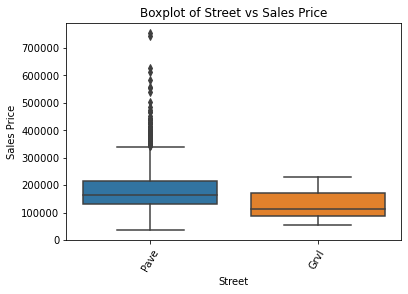

-----
Street
Grvl       6
Pave    1454
Name: Id, dtype: int64
-----


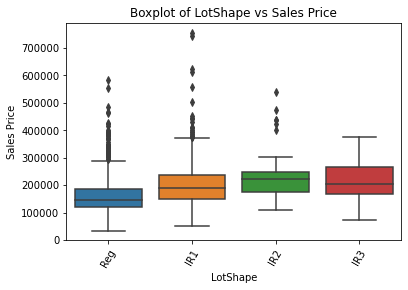

-----
LotShape
IR1    484
IR2     41
IR3     10
Reg    925
Name: Id, dtype: int64
-----


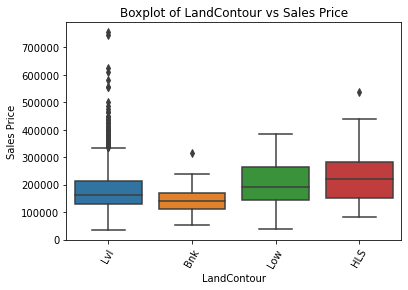

-----
LandContour
Bnk      63
HLS      50
Low      36
Lvl    1311
Name: Id, dtype: int64
-----


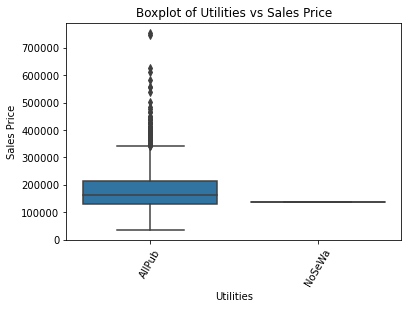

-----
Utilities
AllPub    1459
NoSeWa       1
Name: Id, dtype: int64
-----


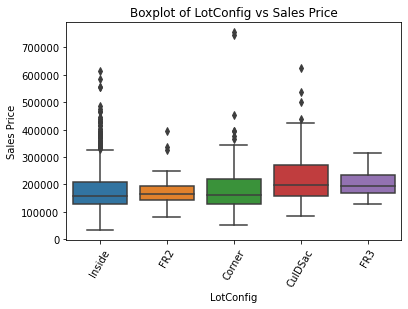

-----
LotConfig
Corner      263
CulDSac      94
FR2          47
FR3           4
Inside     1052
Name: Id, dtype: int64
-----


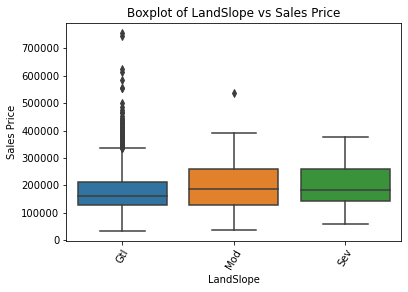

-----
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: Id, dtype: int64
-----


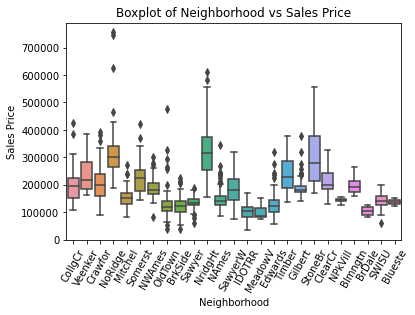

-----
Neighborhood
Blmngtn     17
Blueste      2
BrDale      16
BrkSide     58
ClearCr     28
CollgCr    150
Crawfor     51
Edwards    100
Gilbert     79
IDOTRR      37
MeadowV     17
Mitchel     49
NAmes      225
NPkVill      9
NWAmes      73
NoRidge     41
NridgHt     77
OldTown    113
SWISU       25
Sawyer      74
SawyerW     59
Somerst     86
StoneBr     25
Timber      38
Veenker     11
Name: Id, dtype: int64
-----


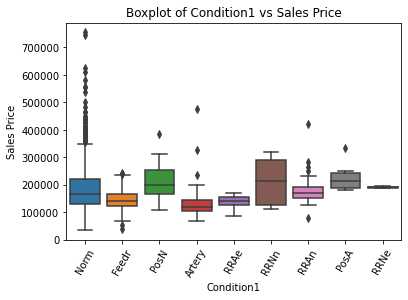

-----
Condition1
Artery      48
Feedr       81
Norm      1260
PosA         8
PosN        19
RRAe        11
RRAn        26
RRNe         2
RRNn         5
Name: Id, dtype: int64
-----


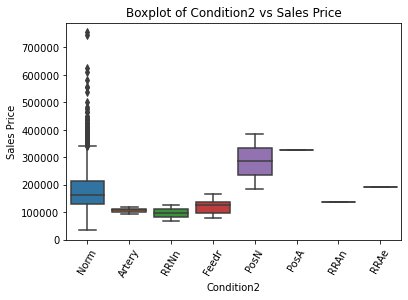

-----
Condition2
Artery       2
Feedr        6
Norm      1445
PosA         1
PosN         2
RRAe         1
RRAn         1
RRNn         2
Name: Id, dtype: int64
-----


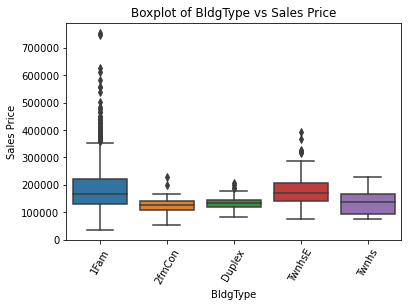

-----
BldgType
1Fam      1220
2fmCon      31
Duplex      52
Twnhs       43
TwnhsE     114
Name: Id, dtype: int64
-----


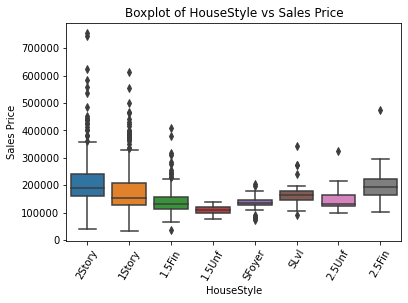

-----
HouseStyle
1.5Fin    154
1.5Unf     14
1Story    726
2.5Fin      8
2.5Unf     11
2Story    445
SFoyer     37
SLvl       65
Name: Id, dtype: int64
-----


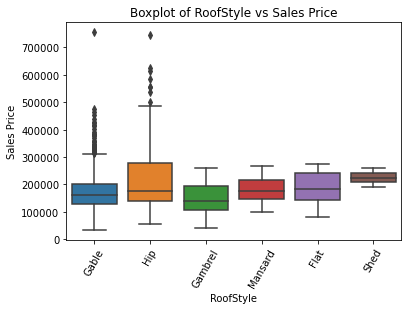

-----
RoofStyle
Flat         13
Gable      1141
Gambrel      11
Hip         286
Mansard       7
Shed          2
Name: Id, dtype: int64
-----


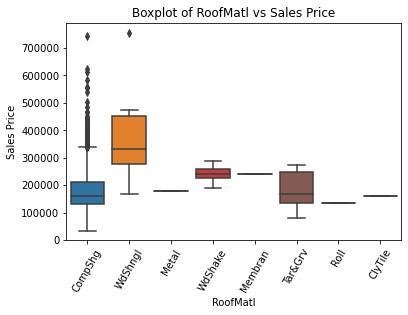

-----
RoofMatl
ClyTile       1
CompShg    1434
Membran       1
Metal         1
Roll          1
Tar&Grv      11
WdShake       5
WdShngl       6
Name: Id, dtype: int64
-----


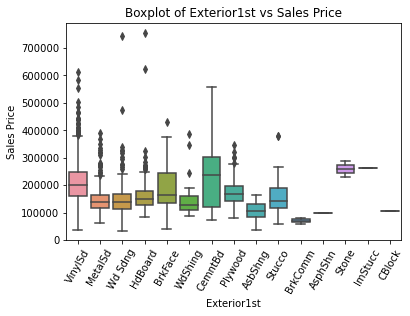

-----
Exterior1st
AsbShng     20
AsphShn      1
BrkComm      2
BrkFace     50
CBlock       1
CemntBd     61
HdBoard    222
ImStucc      1
MetalSd    220
Plywood    108
Stone        2
Stucco      25
VinylSd    515
Wd Sdng    206
WdShing     26
Name: Id, dtype: int64
-----


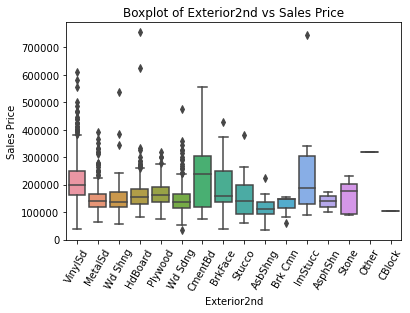

-----
Exterior2nd
AsbShng     20
AsphShn      3
Brk Cmn      7
BrkFace     25
CBlock       1
CmentBd     60
HdBoard    207
ImStucc     10
MetalSd    214
Other        1
Plywood    142
Stone        5
Stucco      26
VinylSd    504
Wd Sdng    197
Wd Shng     38
Name: Id, dtype: int64
-----


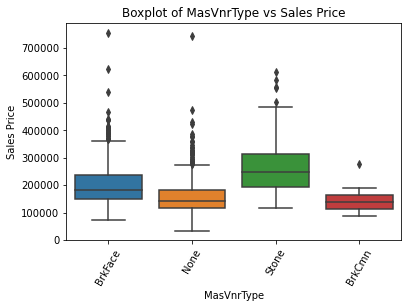

-----
MasVnrType
BrkCmn      15
BrkFace    445
None       864
Stone      128
Name: Id, dtype: int64
-----


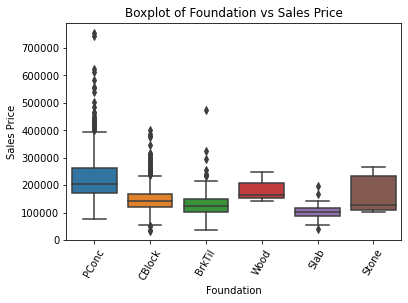

-----
Foundation
BrkTil    146
CBlock    634
PConc     647
Slab       24
Stone       6
Wood        3
Name: Id, dtype: int64
-----


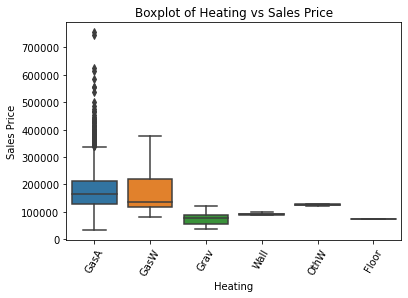

-----
Heating
Floor       1
GasA     1428
GasW       18
Grav        7
OthW        2
Wall        4
Name: Id, dtype: int64
-----


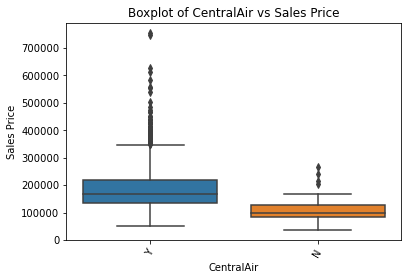

-----
CentralAir
N      95
Y    1365
Name: Id, dtype: int64
-----


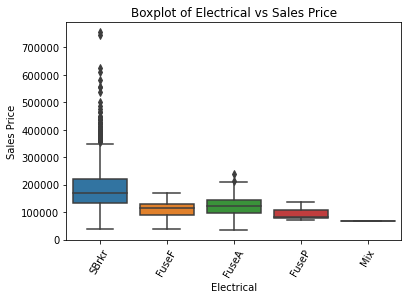

-----
Electrical
FuseA      94
FuseF      27
FuseP       3
Mix         1
SBrkr    1334
Name: Id, dtype: int64
-----


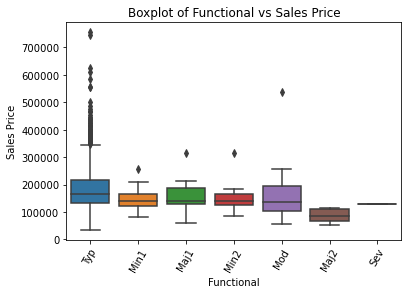

-----
Functional
Maj1      14
Maj2       5
Min1      31
Min2      34
Mod       15
Sev        1
Typ     1360
Name: Id, dtype: int64
-----


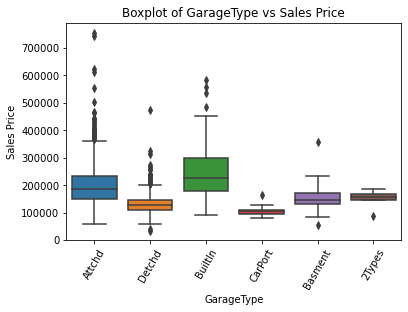

-----
GarageType
2Types       6
Attchd     870
Basment     19
BuiltIn     88
CarPort      9
Detchd     387
Name: Id, dtype: int64
-----


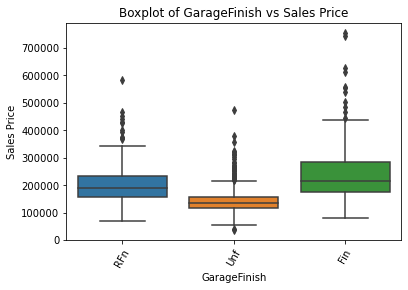

-----
GarageFinish
Fin    352
RFn    422
Unf    605
Name: Id, dtype: int64
-----


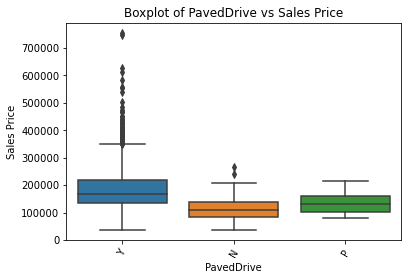

-----
PavedDrive
N      90
P      30
Y    1340
Name: Id, dtype: int64
-----


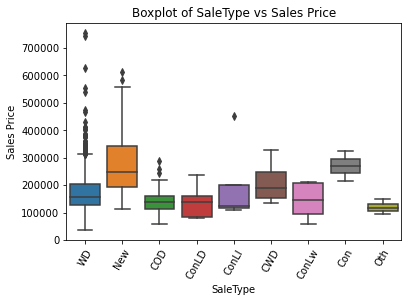

-----
SaleType
COD        43
CWD         4
Con         2
ConLD       9
ConLI       5
ConLw       5
New       122
Oth         3
WD       1267
Name: Id, dtype: int64
-----


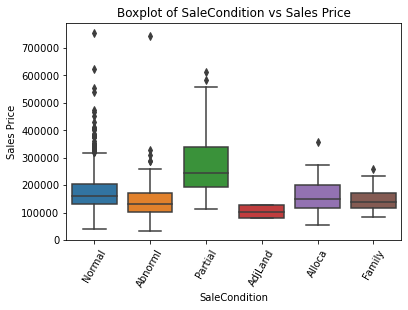

-----
SaleCondition
Abnorml     101
AdjLand       4
Alloca       12
Family       20
Normal     1198
Partial     125
Name: Id, dtype: int64
-----


In [13]:
newly_encoded_vars = cols_tobe_encoded + ['BsmtExposure','BsmtFinType1','BsmtFinType2']

# observing boxplots of remaining categorical variables to understand which features to use
categorical_vars = [col for col in categorical_data if col not in newly_encoded_vars]

fig, ax = plt.subplots(figsize=(6, 6))

for col in categorical_vars:
    ax = sns.boxplot(x=col, y='SalePrice', data=df)
    plt.xlabel(col)
    plt.xticks(rotation = 60)
    plt.ylabel("Sales Price")
    plt.title("Boxplot of {} vs Sales Price".format(col))
    plt.show()
    print("-----")
    print(df.groupby(col)['Id'].count())
    print("-----")

In [14]:
# remembering that there are still null values in the remaining categorical variables,
# I will be imputing the missing values with mode
selected_categorical_vars = ['Neighborhood','HouseStyle','Foundation','GarageType','GarageFinish']
for col in selected_categorical_vars:
    if df[col].isna().sum() > 0:
        df.loc[:,col] = df.loc[:,col].fillna(df[col].mode()[0])

In [15]:
df_one_hot = pd.get_dummies(df[selected_categorical_vars]) #one-hot-encoding the categorical vars

### Summary

Here is a summary of the steps taken.
1. I searched for missing values in categorical variables and imputed them with the mode.
2. I selected the following categorical variables ['Neighborhood','HouseStyle','Foundation','GarageType','GarageFinish'] based on the evaluation of the boxplots and the distribution of the data across the categories.
3. One-hot encoded the selected categorical variables.


## 3.2 Continous Variables
Next, I will be exploring the continous/numeric variables.

In [16]:
numeric_data

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [17]:
df.loc[:, 'AgeBuilt'] = df['YearBuilt'].max() - df['YearBuilt'] #feature engineering to create new column 'AgeBuilt'
df.loc[:, 'AgeMod'] = df['YearRemodAdd'].max() - df['YearRemodAdd']  #feature engineering to create new column 'AgeMod'

#removing YearBuilt and YearRemodAdd as these do not describe any characteristics of the variable
year_cols = ['YearBuilt', 'YearRemodAdd','GarageYrBlt']
#removing Id column too
year_cols += 'Id'

numeric_cols = [col for col in numeric_data if col not in year_cols]
numeric_cols += ['AgeBuilt']
numeric_cols += ['AgeMod']

df_numeric_analysis = df[numeric_cols]
print(df_numeric_analysis.columns)

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'AgeBuilt', 'AgeMod'],
      dtype='object')


In [18]:
#imputing missing numeric data with 0
for col in numeric_data:
    df[col].fillna(0, inplace=True)

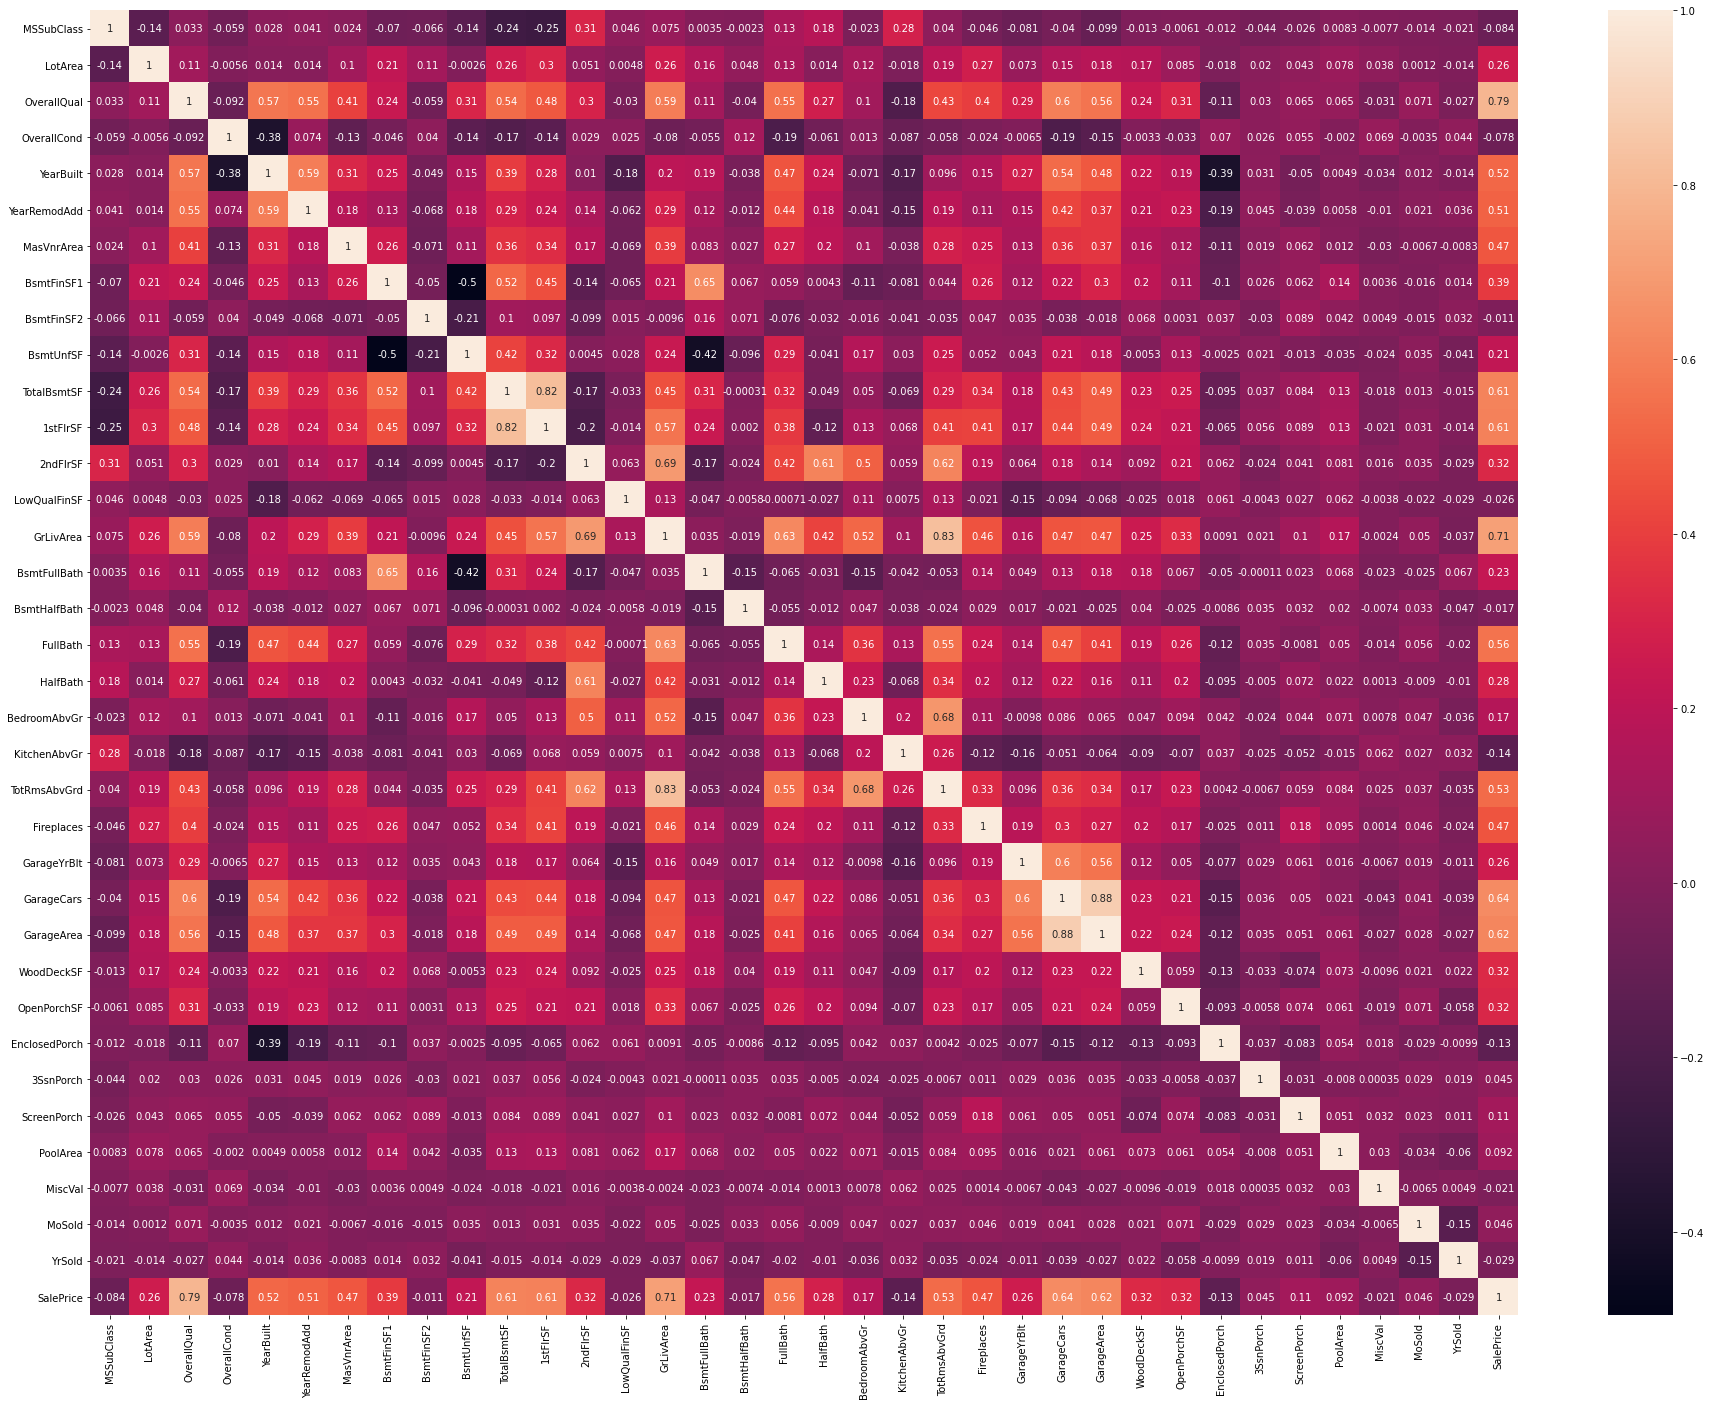

In [19]:
numeric_cols.remove("SalePrice")
numeric_cols.append("SalePrice") #moving predicted variable to the end

fig, ax = plt.subplots(figsize=(32,24))
ax = sns.heatmap(df[numeric_data].corr(), annot=True)

From the above observation, there are many continous variables that are highly correlated with each other, and therefore they need to be removed.

## 3.3 Final Summary
Here were the steps undertaken in EDA.

1. I dropped colummns that contained more than 10% NULL values.
2. I also dropped columns that describe the year in which the house and garage were built.
3. Observed features that some features are highly correlated with each other.
4. Imputed missing values with 0

Due to features being highly-correlated with each other, I will have to remove them.

# 4. Model Building
Here, I will be building the model in three different ways -  A Multiple Linear Regression model, a Ridge Ression Model, and a Lasso Regression Model. 

In [20]:
numeric_cols = numeric_cols[:-1]
print(numeric_cols)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'AgeBuilt', 'AgeMod']


In [21]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

scaler = StandardScaler() #use standardized scaling

df[numeric_cols] = scaler.fit_transform(df[numeric_cols]) # performing standardized scaling on all continous variables
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,...,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeBuilt,AgeMod
0,1,0.073375,RL,-0.207142,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.651479,-0.517200,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.514104,...,0.912210,Typ,-0.951226,Attchd,2003.0,RFn,0.311725,0.351000,3.0,3.0,Y,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,WD,Normal,208500,-1.050994,-0.878668
1,2,-0.872563,RL,-0.091886,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,-0.071836,2.179628,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,-0.570750,...,-0.318683,Typ,0.600495,Attchd,1976.0,RFn,0.311725,-0.060731,3.0,3.0,Y,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,WD,Normal,181500,-0.156734,0.429577
2,3,0.073375,RL,0.073480,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.651479,-0.517200,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.325915,...,-0.318683,Typ,0.600495,Attchd,2001.0,RFn,0.311725,0.631726,3.0,3.0,Y,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,WD,Normal,223500,-0.984752,-0.830215
3,4,0.309859,RL,-0.096897,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,0.651479,-0.517200,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,-0.570750,...,0.296763,Typ,0.600495,Detchd,1998.0,Unf,1.650307,0.790804,3.0,3.0,Y,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,WD,Abnorml,140000,1.863632,0.720298
4,5,0.073375,RL,0.375148,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,1.374795,-0.517200,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.366489,...,1.527656,Typ,0.600495,Attchd,2000.0,RFn,1.650307,1.698485,3.0,3.0,Y,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,WD,Normal,250000,-0.951632,-0.733308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,0.073375,RL,-0.260560,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,-0.071836,-0.517200,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,-0.570750,...,0.296763,Typ,0.600495,Attchd,1999.0,RFn,0.311725,-0.060731,3.0,3.0,Y,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,WD,Normal,175000,-0.918511,-0.733308
1456,1457,-0.872563,RL,0.266407,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,-0.071836,0.381743,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,0.087911,...,0.296763,Min1,2.152216,Attchd,1978.0,Unf,0.311725,0.126420,3.0,3.0,Y,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210,WD,Normal,210000,-0.222975,-0.151865
1457,1458,0.309859,RL,-0.147810,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,0.651479,3.078570,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,-0.570750,...,1.527656,Typ,2.152216,Attchd,1941.0,RFn,-1.026858,-1.033914,3.0,3.0,Y,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210,WD,Normal,266500,1.002492,-1.024029
1458,1459,-0.872563,RL,-0.080160,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,-0.795151,0.381743,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,-0.570750,...,-0.934130,Typ,-0.951226,Attchd,1950.0,Unf,-1.026858,-1.090059,3.0,3.0,Y,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210,WD,Normal,142125,0.704406,-0.539493


In [22]:
selected_cols = newly_encoded_vars + numeric_cols #adding in numeric cols with the categorical variables
print(selected_cols)

['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'AgeBuilt', 'AgeMod']


In [23]:
correlation_matrix = df[selected_cols].corr()

In [24]:
# finding high correlated features and removing highly correlated features
correlated_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            colname = correlation_matrix.columns[i]
            correlated_features.append(colname)
            
print(correlated_features)

['BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'KitchenQual', 'KitchenQual', 'GarageCond', 'OverallQual', 'OverallQual', 'OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'TotalBsmtSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GrLivArea', 'GrLivArea', 'BsmtFullBath', 'BsmtFullBath', 'FullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'BedroomAbvGr', 'TotRmsAbvGrd', 'TotRmsAbvGrd', 'TotRmsAbvGrd', 'TotRmsAbvGrd', 'GarageCars', 'GarageCars', 'GarageCars', 'GarageCars', 'GarageCars', 'GarageArea', 'GarageArea', 'GarageArea', 'GarageArea', 'AgeBuilt', 'AgeBuilt', 'AgeBuilt', 'AgeBuilt', 'AgeBuilt', 'AgeMod', 'AgeMod', 'AgeMod', 'AgeMod', 'AgeMod', 'AgeMod']


In [25]:
selected_cols = [col for col in selected_cols if col not in correlated_features]

In [26]:
df_final = pd.concat([df[selected_cols], df_one_hot], axis=1)
df_final

,ExterQual,ExterCond,GarageQual,BsmtExposure,BsmtFinType1,BsmtFinType2,MSSubClass,LotArea,OverallCond,MasVnrArea,BsmtUnfSF,2ndFlrSF,LowQualFinSF,BsmtHalfBath,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,...,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,4,3,3.0,1.0,6.0,1.0,0.073375,-0.207142,-0.517200,0.514104,-0.944591,1.161852,-0.120242,-0.241061,-0.211454,-0.951226,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,3,3,3.0,4.0,5.0,1.0,-0.872563,-0.091886,2.179628,-0.570750,-0.641228,-0.795163,-0.120242,3.948809,-0.211454,0.600495,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,...,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,4,3,3.0,2.0,6.0,1.0,0.073375,0.073480,-0.517200,0.325915,-0.301643,1.189351,-0.120242,-0.241061,-0.211454,0.600495,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,3,3,3.0,1.0,5.0,1.0,0.309859,-0.096897,-0.517200,-0.570750,-0.061670,0.937276,-0.120242,-0.241061,-0.211454,0.600495,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,4,3,3.0,3.0,6.0,1.0,0.073375,0.375148,-0.517200,1.366489,-0.174865,1.617877,-0.120242,-0.241061,-0.211454,0.600495,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,3,3.0,1.0,1.0,1.0,0.073375,-0.260560,-0.517200,-0.570750,0.873321,0.795198,-0.120242,-0.241061,-0.211454,0.600495,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1456,3,3,3.0,1.0,5.0,3.0,-0.872563,0.266407,0.381743,0.087911,0.049262,-0.795163,-0.120242,-0.241061,-0.211454,2.152216,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1457,5,4,3.0,1.0,6.0,1.0,0.309859,-0.147810,3.078570,-0.570750,0.701265,1.844744,-0.120242,-0.241061,-0.211454,2.152216,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1458,3,3,3.0,2.0,6.0,3.0,-0.872563,-0.080160,0.381743,-0.570750,-1.284176,-0.795163,-0.120242,-0.241061,-0.211454,-0.951226,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [27]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [28]:
from sklearn.model_selection import train_test_split

df_train = df_final
target = df.loc[:,'SalePrice'].values
X_train, X_test, y_train, y_test = train_test_split(df_train, target, train_size = 0.75, test_size = 0.25, random_state = 42)

## 4.1 Multiple Regression

I will be building a multiple regression model without any forms of regularization here. I will be first doing RFE by selecting arbitrarily 30 variables.

In [29]:
lm.fit(X_train, y_train)

rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [30]:
from sklearn.metrics import r2_score, mean_squared_error

#def adjusted_r2_score(r2_score,n,p): #calculate adjusted R2 score
#    return 1- ((1-r2_score) * (n-1)/(n-p-1))

In [31]:
rfe_cols = X_train.columns[rfe.support_]

X_train_lm_rfe, X_test_lm_rfe = X_train[rfe_cols], X_test[rfe_cols]
rfe = rfe.fit(X_train_lm_rfe, y_train)

y_pred_train = rfe.predict(X_train_lm_rfe)
y_pred_test = rfe.predict(X_test_lm_rfe)

In [32]:
n, p = y_train.shape[0], len(rfe.support_)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 score: ", r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 score: ", r2_test_lr)
metric.append(r2_test_lr)

#r2_train_lr = adjusted_r2_score(r2_train_lr, n, p)
#print("Train Adjusted R2 score: ", r2_train_lr)
#metric.append(r2_train_lr)

#r2_test_lr = adjusted_r2_score(r2_test_lr, n, p)
#print("Test Adjusted R2 score: ", r2_test_lr)
#metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Training RSS: ", rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Training MSE: ",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ", mse_test_lr)
metric.append(mse_test_lr**0.5)

Train R2 score:  0.7579306910674523
Test R2 score:  0.7871225143034738
Training RSS:  1609333027061.2827
Test RSS:  544314490820.02496
Training MSE:  1469710526.9966052
Test MSE:  1491272577.5891094


## 3.2 Ridge Regression

I will be building a Ridge Regression model here. As Ridge Regression does not perform feature selection and will only shrink less important features close to zero, I have chosen to manually do a RFE before implmenting Ridge Regression.

In [33]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_lm_rfe, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [34]:
print(model_cv.best_params_)

{'alpha': 3.0}


In [35]:
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_lm_rfe, y_train)
print(ridge.coef_)

[ 37783.00342433  15044.01627677 -12168.38158262  39884.10939065
  13956.86294413 -15395.17365244  -7537.38756989 -25448.92636401
  12614.70212248 -29307.03686617 -16867.81636923 -30472.91598757
 -21177.40735207 -16948.05688684  13812.47029872  57866.41516409
  66021.5551588  -24528.64544926 -25147.18316754 -19562.57404328
  27241.98709934  65067.713806    17400.88837572 -17694.73560321
  15736.62472851 -28155.36349165 -33595.1760838  -12876.85337969
 -11967.59370901  19632.83493467]


In [36]:
n, p = y_train.shape[0], len(rfe.support_)

y_pred_train = ridge.predict(X_train_lm_rfe)
y_pred_test = ridge.predict(X_test_lm_rfe)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 score: ", r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 score: ", r2_test_lr)
metric.append(r2_test_lr)

#r2_train_lr = adjusted_r2_score(r2_train_lr, n, p)
#print("Train Adjusted R2 score: ", r2_train_lr)
#metric.append(r2_train_lr)

#r2_test_lr = adjusted_r2_score(r2_test_lr, n, p)
#print("Test Adjusted R2 score: ", r2_test_lr)
#metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Training RSS: ", rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Training MSE: ",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ", mse_test_lr)
metric.append(mse_test_lr**0.5)

Train R2 score:  0.756262550905576
Test R2 score:  0.7864767127559281
Training RSS:  1620423210563.3262
Test RSS:  545965765210.89325
Training MSE:  1479838548.4596586
Test MSE:  1495796617.016146


# 3.3 Lasso Regression

In performing Lasso Regression, RFE is not necessary as Lasso Regression shrinks any variables that are insignficant in impacting the depedent variable to 0. Therefore, I will be putting all the features into the model.

In [37]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [38]:
print(model_cv.best_params_)

{'alpha': 50}


In [39]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [40]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 score: ", r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 score: ", r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Training RSS: ", rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Training MSE: ",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ", mse_test_lr)
metric.append(mse_test_lr**0.5)

Train R2 score:  0.7934855400071589
Test R2 score:  0.814927264360339
Training RSS:  1372956127721.3137
Test RSS:  473219474265.9675
Training MSE:  1253841212.5308802
Test MSE:  1296491710.3177192


## Summary


# 5. Model Evaluation

Performing model evaluation to know if my Lasso Regression fulfills the assumptions of Linear Regression.

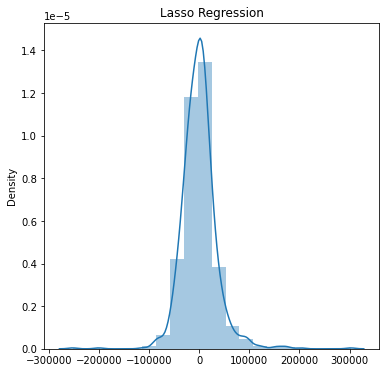

In [41]:
alpha = 100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.distplot((y_train - y_pred_train), bins = 20)
plt.title("Lasso Regression")
plt.show()

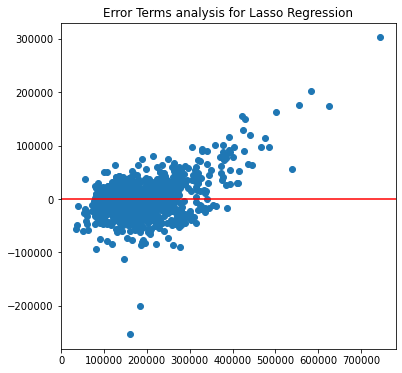

In [42]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_train,y_train - y_pred_train)
plt.axhline(0, color='red')
plt.title("Error Terms analysis for Lasso Regression")
plt.show()

In my opinion, the Lasso Regression model is passable as the histogram shows that the error terms follow a normal distribution as shown in the histogram, but the error terms does not appear to be very evenly distributed noise around zero. A graph showing more evenly disbributed noise around zero would be more ideal.  

## 4.4 Summary

I will choose the Lasso Regression due to the large number of feature variables which I had, and Lasso Regression performs Feature Selection. As I had not performed too much EDA and I am not an expert in this field and I do not know what is the optimal number of variables of RFE, therefore, I would like to use the Lasso Regression so that Lasso Regression will automatically penalize the less important features, and remove highly-correlated features by selecting one and shrinking the others to zero. 

# 7. Subjective Questions

Below are the code to answer the subjective questions and not part of the assignment.

In [43]:
#subjective question part for Ridge
alpha = 6 #doubling the alpha as requested by subjective question
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train_lm_rfe, y_train)

y_pred_train = ridge2.predict(X_train_lm_rfe)
y_pred_test = ridge2.predict(X_test_lm_rfe)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 score: ", r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 score: ", r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Training RSS: ", rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Training MSE: ",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ", mse_test_lr)
metric.append(mse_test_lr**0.5)

Train R2 score:  0.7532560191283126
Test R2 score:  0.7839258055784857
Training RSS:  1640411332590.8374
Test RSS:  552488276207.6556
Training MSE:  1498092541.1788468
Test MSE:  1513666510.1579607


In [44]:
#subjective question part for Lasso
alpha =200 #doubling the alpha to answer subjective question

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train, y_train) 

y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)


metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 score: ", r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 score: ", r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Training RSS: ", rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Training MSE: ",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ", mse_test_lr)
metric.append(mse_test_lr**0.5)

Train R2 score:  0.7872024227365189
Test R2 score:  0.8138763865287011
Training RSS:  1414727751646.4175
Test RSS:  475906503521.1771
Training MSE:  1291988814.2889657
Test MSE:  1303853434.3045948


In [45]:
#observing the beta coefficients of the Ridge Regression models
df_ridge = pd.DataFrame(index=X_train_lm_rfe.columns)
df_ridge.rows = X_train_lm_rfe.columns
df_ridge['Ridge'] = ridge.coef_

df_ridge.sort_values(by='Ridge', key=abs, ascending= False)

,Ridge
Neighborhood_NridgHt,66021.555159
Neighborhood_StoneBr,65067.713806
Neighborhood_NoRidge,57866.415164
2ndFlrSF,39884.109391
ExterQual,37783.003424
HouseStyle_2Story,-33595.176084
Neighborhood_IDOTRR,-30472.915988
Neighborhood_Edwards,-29307.036866
HouseStyle_2.5Unf,-28155.363492
Neighborhood_Somerst,27241.987099


In [46]:
# ridge regression when alpha is doubled
df_ridge2 = pd.DataFrame(index=X_train_lm_rfe.columns)
df_ridge2.rows = X_train_lm_rfe.columns
df_ridge2['Ridge'] = ridge2.coef_

df_ridge2.sort_values(by='Ridge', key=abs, ascending= False)

,Ridge
Neighborhood_NridgHt,60697.565039
Neighborhood_StoneBr,56176.382932
Neighborhood_NoRidge,52379.430392
ExterQual,39526.610840
2ndFlrSF,38343.487774
HouseStyle_2Story,-28589.056335
Neighborhood_Edwards,-27466.201508
Neighborhood_IDOTRR,-26675.327804
Neighborhood_Somerst,24785.828774
Neighborhood_BrkSide,-23052.790574


In [47]:
#answering subjective question part
df_betas = pd.DataFrame(index=df_train.columns)
df_betas.rows = df_train.columns
df_betas['Lasso'] = lasso.coef_

pd.set_option('display.max_rows', None)
df_betas.sort_values(by='Lasso', key=abs, ascending= False)

,Lasso
Neighborhood_StoneBr,75522.864626
Neighborhood_NridgHt,66271.244249
Neighborhood_NoRidge,50000.791586
2ndFlrSF,32174.175507
Neighborhood_Somerst,30830.587802
ExterQual,25976.400932
Neighborhood_Veenker,25408.948012
Neighborhood_Crawfor,24396.906921
HouseStyle_2Story,-20362.612869
Foundation_Slab,18362.564817


In [48]:
# lasso regression when alpha is doubled
df_betas2 = pd.DataFrame(index=df_train.columns)
df_betas2.rows = df_train.columns
df_betas2['Lasso'] = lasso2.coef_

pd.set_option('display.max_rows', None)
df_betas2.sort_values(by='Lasso', key=abs, ascending= False)

,Lasso
Neighborhood_StoneBr,67283.901440
Neighborhood_NridgHt,60925.957041
Neighborhood_NoRidge,44656.885049
2ndFlrSF,29920.691788
ExterQual,27891.180388
Neighborhood_Somerst,27089.565843
Neighborhood_Crawfor,22063.653390
HouseStyle_2Story,-14659.718735
Foundation_PConc,14521.295796
HouseStyle_1Story,13981.589526


In [49]:
#removing top 5 variables from lasso regression model
outside_five = df_betas.sort_values(by='Lasso', key=abs, ascending= False).reset_index().iloc[5:,0].values
print(outside_five)

['ExterQual' 'Neighborhood_Veenker' 'Neighborhood_Crawfor'
 'HouseStyle_2Story' 'Foundation_Slab' 'Neighborhood_NPkVill'
 'Foundation_PConc' 'Neighborhood_IDOTRR' 'Neighborhood_SWISU'
 'GarageFinish_Fin' 'Neighborhood_Edwards' 'HouseStyle_1Story'
 'MSSubClass' 'BsmtExposure' 'HouseStyle_1.5Fin' 'Fireplaces'
 'Neighborhood_ClearCr' 'Neighborhood_OldTown' 'Neighborhood_Gilbert'
 'LotArea' 'BsmtUnfSF' 'Neighborhood_Sawyer' 'Neighborhood_NAmes'
 'GarageQual' 'HouseStyle_2.5Unf' 'MasVnrArea' 'ExterCond' 'OverallCond'
 'Neighborhood_BrDale' 'GarageType_Attchd' 'BsmtFinType1' 'WoodDeckSF'
 'HouseStyle_SLvl' 'GarageFinish_Unf' 'ScreenPorch' 'Neighborhood_SawyerW'
 'LowQualFinSF' 'Neighborhood_NWAmes' 'Neighborhood_BrkSide'
 'GarageType_Basment' 'KitchenAbvGr' 'Neighborhood_Timber' '3SsnPorch'
 'MiscVal' 'PoolArea' 'OpenPorchSF' 'BsmtHalfBath' 'BsmtFinType2'
 'Neighborhood_MeadowV' 'YrSold' 'HouseStyle_SFoyer' 'EnclosedPorch'
 'MoSold' 'Neighborhood_Blmngtn' 'GarageFinish_RFn' 'Neighborhood_Col

In [50]:
#fitting lasso regression without the top 5 variables

alpha =100

lasso = Lasso(alpha=alpha)

X_train_outside = X_train[outside_five]
X_test_outside = X_test[outside_five]
lasso.fit(X_train_outside, y_train) 

Lasso(alpha=100)

In [51]:
y_pred_train = lasso.predict(X_train_outside)
y_pred_test = lasso.predict(X_test_outside)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 score: ", r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 score: ", r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Training RSS: ", rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Training MSE: ",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ", mse_test_lr)
metric.append(mse_test_lr**0.5)

Train R2 score:  0.7538890229199269
Test R2 score:  0.7768714878100789
Training RSS:  1636202976262.6768
Test RSS:  570525727991.8564
Training MSE:  1494249293.3905723
Test MSE:  1563084186.2790587


In [52]:
df_betas3 = pd.DataFrame(index=X_train_outside.columns)
df_betas3.rows = X_train_outside.columns
df_betas3['Lasso'] = lasso.coef_

pd.set_option('display.max_rows', None)
df_betas3.sort_values(by='Lasso', key=abs, ascending= False)

,Lasso
Neighborhood_Gilbert,-50649.444986
Neighborhood_IDOTRR,-48552.972708
Neighborhood_Edwards,-46115.636787
Neighborhood_SWISU,-39087.346537
HouseStyle_2.5Fin,38923.973075
Neighborhood_NAmes,-38784.908585
Neighborhood_Blmngtn,-38508.807531
Neighborhood_Sawyer,-38495.899845
Neighborhood_CollgCr,-38212.030663
Neighborhood_BrkSide,-37463.089799
